# Chapter Clustering

* Cluster : a collection of objects
    * simlar within cluster
    * dissimilar between clusters

* Clustering: grouing objects in clusters
    * no labels needed <= unsupervised classification
    * plenty of possible clusterings
* Give insights on the data

* Clustering usages:
    * Visualize your data
    * Pattern analysis
    * pre-processing step for other more targetd algorithms
    * outlier detection
    * ..
* Example usages:
    * targeted marketing programs
    * student segmentations
    * Data Mining
* Clustering how?
    * need a measure of similarity $d(..,..)$
        * numerical variables --> euclidean, manhattan distance
        * categorical variables --> dummy variables, or construct your own distance
        
* Clustering Methods
    * k-means
    * Hierarchical ( many variations exist)
    
* Compactness and Separation
![wss_bss](./wss_bss.png)

#### k-Means Algorithm
* Goal: Partition data in **k** disjoint subsets
* steps:
    1. randomly assign **k** centroids
    2. Assign data to closest centroid
    3. Move centroids to average location of currently defined clusters
![kmeans3](./kmeans3.png) 
    4. Repeat step 2 and 3 to find an optimcal **k** untill algo convergence
        * after predtermined number of N iterations
        *  when $WSS / ( WSS + BSS ) < 0.2$
        
* Choosing **k** Scree plot
![scree](./scree_plot.png) 

* k-Means in R

* R> my_km <- kmeans(data,centers, nstart)
    * R>my_km\$tot.withinss
    * R>my_km\$betweenss

List of 9
 $ cluster     : Named int [1:210] 2 2 2 2 2 2 2 2 2 2 ...
  ..- attr(*, "names")= chr [1:210] "1" "2" "3" "4" ...
 $ centers     : num [1:3, 1:7] 12 14.6 18.7 13.3 14.5 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:7] "area" "perimeter" "compactness" "length" ...
 $ totss       : num 2720
 $ withinss    : num [1:3] 196 207 184
 $ tot.withinss: num 587
 $ betweenss   : num 2133
 $ size        : int [1:3] 77 72 61
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
          
seeds_type  1  2  3
         1  9 60  1
         2  0 10 60
         3 68  2  0


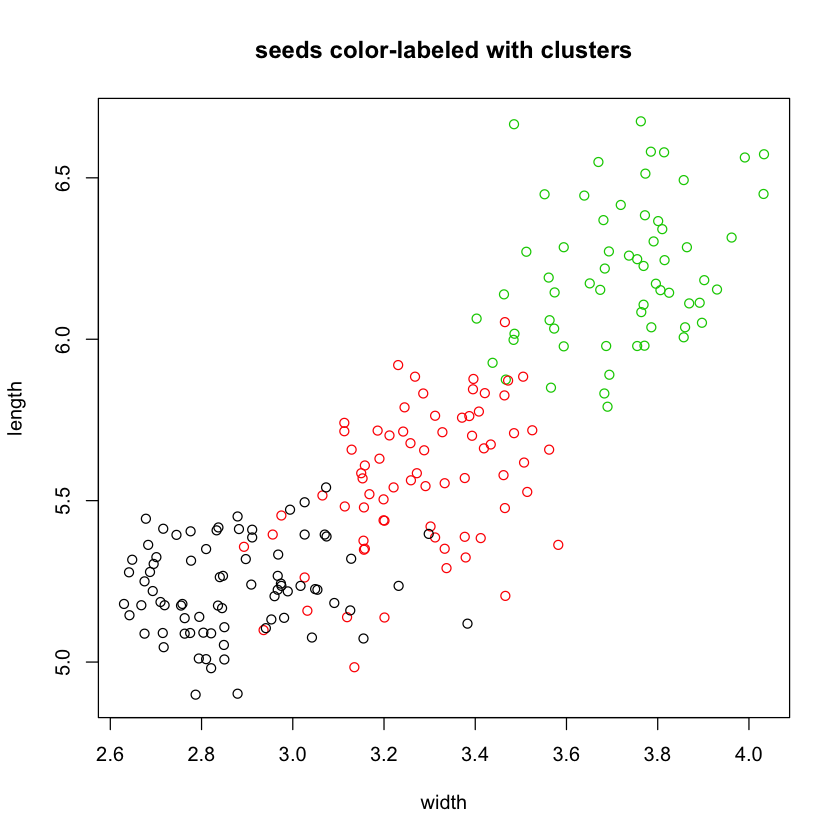

In [3]:
## first example from Performance chapter to apply kmeans
set.seed(100)
##dataset with 3 types of seeds
seeds <- read.csv(file="seeds.csv", row.names=1, header=T)
##actual seeds labels loaded
seeds_type<-c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3)
seeds_km <- kmeans(seeds,  centers=3, nstart=20)
str(seeds_km)
print(table(seeds_type, seeds_km$cluster)) #confusion matirx
plot(length~width, data=seeds, col=seeds_km$cluster, main="seeds color-labeled with clusters")


In [8]:
##check the importance nstart of iterations
set.seed(100)
nstrt <- 1
seeds_km_1<-kmeans(seeds,centers=5, nstart=nstrt)
seeds_km_2<-kmeans(seeds,centers=5, nstart=nstrt)
# Return the ratio of the within cluster sum of squares
print(seeds_km_1$tot.withinss / seeds_km_2$tot.withinss)
print(table(seeds_km_1$cluster,seeds_km_2$cluster ))
#observe how some cluster match and other splitted
#now rerun this code with nstrt <- 15 to see that cluster are not split

[1] 1.006146
   
     1  2  3  4  5
  1  0 16  0  0 18
  2  0 56  0  0  0
  3  0  0 12  0  0
  4  0  0  0 18 41
  5 33  0  3 13  0


[1] 1.00000000 0.32476100 0.17404913 0.11630819 0.09098713 0.07168274 0.05411547

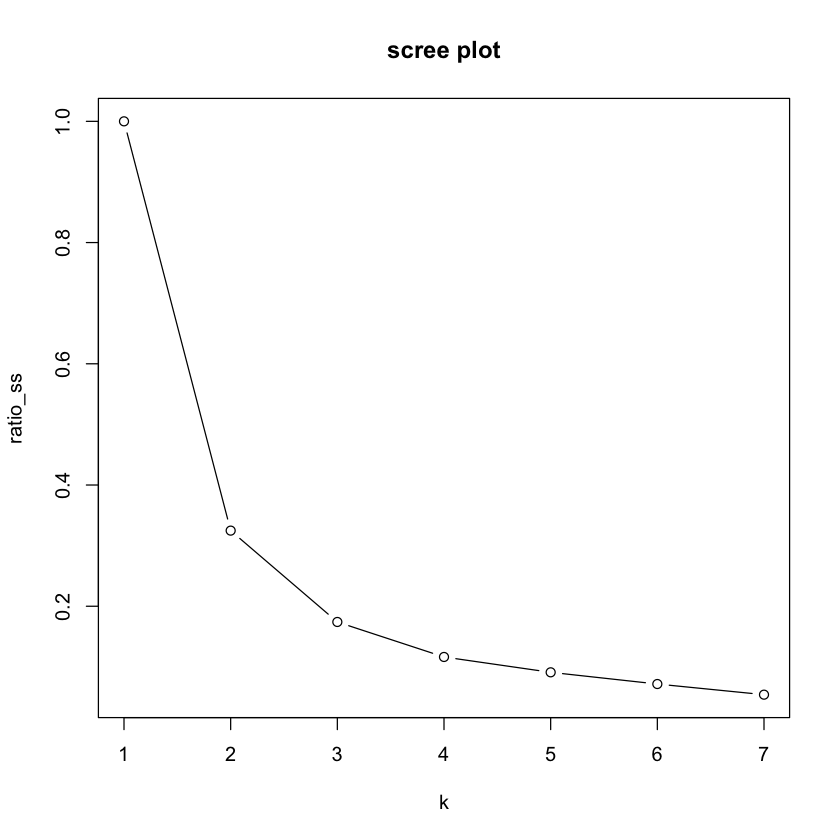

In [12]:
##make a scree plot
#school_result has  school level data recording reading and arithmetic scores for each school's 4th and 6th graders
school_result <- read.csv(file="school_result.csv", row.names=1, header=T)
nk <- 7 #max pojected number of clusters
ratio_ss <- rep(0,nk)
##loop over different k
for (k in 1:nk) {

  school_km <- kmeans(school_result, centers=k, nstart=20)
  ratio_ss[k] <- school_km$tot.withinss / school_km$totss
}
plot(1:nk,ratio_ss, type="b", xlab="k", main="scree plot")
ratio_ss
#from ratio_ss  when k = 3 ratio_ss < 0.2   thus k=3 is a good indication of number of clusters


## Performance and scaling issues

* Cluster evaluation is not trivial. there is no truth
* Goal: Compact and Separated. This is Measurable
* Cluster Measures:  **WSS** and **BSS** are good indicators
    * varianace within clusters,  separation between clusters
* Alternative
    * Diameter, Intercluster Distance
* Diameter and intercluster distance 
$$ Dia_i = \max_{x,y \in C_i}d(x,y) $$
$$ \delta(C_i,C_j) = \min_{x\in C_i, y\in C_j} d(x,y)$$
![diam_interd](./diam_int_distanc.png) 

* Dunn's Index
$$ DI = \frac{ \min_{1\leq i\lt j\leq k}\delta(C_i,C_j) }{\max_{1\leq m\leq k} Dia_m  } $$
    * Higher Dunn: clusers are better separated or more compact
    * but high computational cost
    * worst case indicator ( if 1 cluster is outlier while others are compact  Dunn's index will be uncharacteristically low
    
* Alternative measures
    * Internal Validation: based on intrinsic knowledge
        * BIC Index
        * Silhouette's Index
    * External Validatio: based on previous knowledge
        * Hulbert's  Correlation
        * Jaccard's Coefficient
* R libraries:  cluster and clValid
##### Scale Issues
* Some variable is different, consider a rescale. 
* Multiple variables on different scale, consider stardadization

$$ z_i = \frac{x_i - \mu(x)} {\sigma(x)} $$

* R> scale(data)
* NB Standardizaing  can lead to a more difficult interpretation of data